# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
# Arquivos de treino e teste carregados
x_teste = pd.read_csv('x_teste.csv', delimiter=',')
y_teste = pd.read_csv('y_teste.csv', delimiter=',')
x_treino = pd.read_csv('x_treino_balanced.csv', delimiter=',')
y_treino = pd.read_csv('y_treino_balanced.csv', delimiter=',')
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Verificando disposição das bases
treino_balanceado = y_treino.value_counts()
print('Balanceamento do y_treino: \n', treino_balanceado, '\n')
teste_balanceado = y_teste.value_counts()
print('Balanceamento do y_teste: \n', teste_balanceado)

print(x_treino, '\n\n Tamanho de x_treino: ', x_treino.shape)
print(x_teste, '\n\n Tamanho de x_teste: ', x_teste.shape)
print(y_treino, '\n\n Tamanho de y_treino: ', y_treino.shape)
print(y_teste, '\n\n Tamanho de y_teste: ', y_teste.shape)

Balanceamento do y_treino: 
 label_Pontuacao_Credito
0                          81
1                          81
2                          81
Name: count, dtype: int64 

Balanceamento do y_teste: 
 label_Pontuacao_Credito
0                          32
2                          11
1                           7
Name: count, dtype: int64
     Idade  Genero  Salario_Anual  Estado_Civil  Numero_Filhos  \
0       45       0         115000             0              3   
1       36       1         135000             0              0   
2       45       0         110000             0              3   
3       36       1          47500             1              0   
4       26       0          40000             1              0   
..     ...     ...            ...           ...            ...   
238     33       1          52500             1              0   
239     27       0          63767             1              0   
240     32       1          57500             1              0   
2

- As bases de treino e teste estão corretas em número de linhas e colunas.

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

## Documentando passo a passo do tratamento e pré-processamento dos dados do dataframe de Credit-Score
- Para a aplicação do modelo de Árvore de Decisão, inicialmente, no pré-processamento dos dados, realizamos a análise exploratória, a pré-modelagem e modelagem, etapa as quais são feitas a visualização e tratamento dos dados do dataframe, identificamos os dados que estamos lidando e detectando as inconsistências como dados nulos, tipagem dos dados e erros ortográficos, e assim fazer a transformação ou exclusão dos mesmos. No caso deste dataframe, não houve exclusões, e sim, apenas substituições, mudança da tipagem dos dados e tradução do inglês para o português.

- Na nossa próxima etapa, foi realizada a análise univariada onde detectamos a existência de outliers de acordo com os valores mostrados da função describe(), nos trazendo valores como variância, média e mediana. Em seguida, são feitas análises em gráficos para verificar visualmente a presença de outliers e decidir possíveis tratamentos a partir dos insights. Como não haviam outliers no dataframe, não foi necessário nenhum tipo de tratativa.

- Seguindo para a análise bivariada, são analisados gráficos mais complexos trazendo o comportamento e a relação entre 2 variáveis distintas e observando possíveis conexões entre ambas e trazendo suposições do porquê a variável principal possui determinado rótulo/valor. Depois, a matriz de correlação é feita através da função corr() para verificarmos o quão fortemente ligadas as variáveis estão umas com as demais, após a transformação de variáveis categóricas em variáveis numéricas utilizando, por exemplo, LabelEncoder e One Hot para darmos seguimento às análises estatísticas do dataframe.

- Por fim, as bases de treino e de teste são criadas e salvas, após a verificação da igualdade de número de linhas entre as bases e testes e da necessidade de balanceamento dos dados. Nesta situação, como a base apresentava desbalanço, a função SMOTE foi utilizada para o balanceamento por oversampling, a fim de igualar a quantidade de amostras de cada rótulo na base de treino, criando linhas sintéticas.

- Com as bases prontas para uso, o primeiro modelo de machine learning é aplicado para testarmos sua eficácia na base: o naive Bayes. Para análise do modelo, as bases de treino e teste são carregadas e é feita mais uma verificação das bases antes do uso.

- Feito a verificação, a instância criada com GaussianNB() utilizou as bases de treino para praticar e foi avaliada em seguida com as mesmas bases para identificar se o modelo estava prevendo corretamente os rótulos de Crédito e então são calculadas a eficácia e recall do modelo e plotado uma matriz de confusão. O mesmo processo foi feito com as bases de teste.

- A partir dos cálculos e da visualização das matrizes de confusão, entendemos que apesar do modelo ter apresentado bons valores de ajuste e, por mais que o modelo também foi projetado para bases menores, o resultado nos dá fortes indícios que o alto desempenho seja devido ao overfitting, ou seja, o modelo apenas memorizou as linhas apresentadas e não houve aprendizado significativo.

- Na etapa atual, o modelo utilizado é a Árvore de Decisão. Diferente do Naive Bayes, que encara as features da base como independentes, a Árvore de decisão busca fazer a identificação dos rótulos a partir das variáveis que trazem informações mais importantes e fazer um condicionamento lógico com essas features. Na instância escolhemos utilizar os critérios do índice de gini. Em seguida, são calculadas as acurácias na etapa de treino, teste e teste reduzido com apenas as duas features mais importantes da base e também visualizar na base de treino como o modelo realiza a separação dos rótulos plotando uma árvore de decisão.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modelo com os dados de treino.

In [3]:
# Instanciando Árvore de Decisão
arvore_credito = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
arvore_credito.fit(x_treino, y_treino)
print(arvore_credito)
# para verificar parâmetros de qualquer função, use print(NOME_FUNÇÃO.get_params())

# Verificando acurácia do modelo de treino
prev = arvore_credito.predict(x_treino)
acuracia = accuracy_score(y_treino, prev)
print('\nAcurácia do modelo de treino: ', acuracia)

DecisionTreeClassifier(random_state=0)

Acurácia do modelo de treino:  1.0


- A Acurácia do modelo de treino foi equivalente a 100%, mostrando que a generalização dos dados foi perfeita.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [4]:
# Verificando acurácia do modelo de teste
prevt = arvore_credito.predict(x_teste)
acuraciat = accuracy_score(y_teste, prevt)
print('\nAcurácia do modelo de teste: ', acuraciat)


Acurácia do modelo de teste:  0.94


- O desempenho da base de teste foi equivalente a 0.94, ou seja, o modelo tem taxa de 94% de acerto na classificação da pontuação de Crédito, o que é um desempenho muito bom na generalização dos dados. Porém, é importante ressaltar que, por conta da acurácia da base de treino ter retornado como 1 e a base de teste ter resultado ligeiramente abaixo, esses valores podem indicar overfitting.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

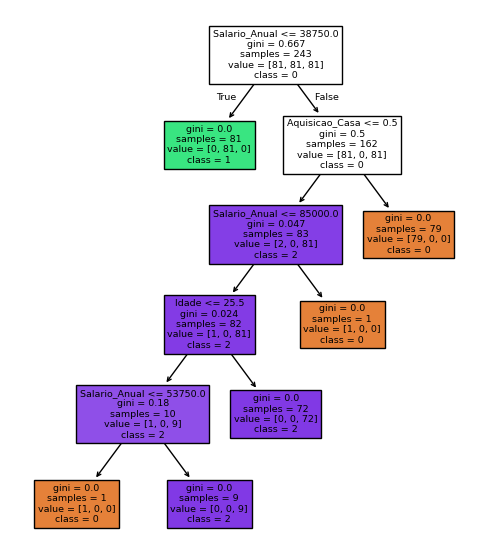

In [5]:
# Plotando Árvore de Decisão
plt.figure(figsize=(6, 7))
plot_tree(arvore_credito, filled=True, feature_names=x_treino.columns, class_names=['0','1','2'])
plt.show()

- É possível observar claramente a árvore de decisão por possuir pouca profundidade. A árvore possui 5 níveis.

# 6) Identifique as 2 principais features do modelo.


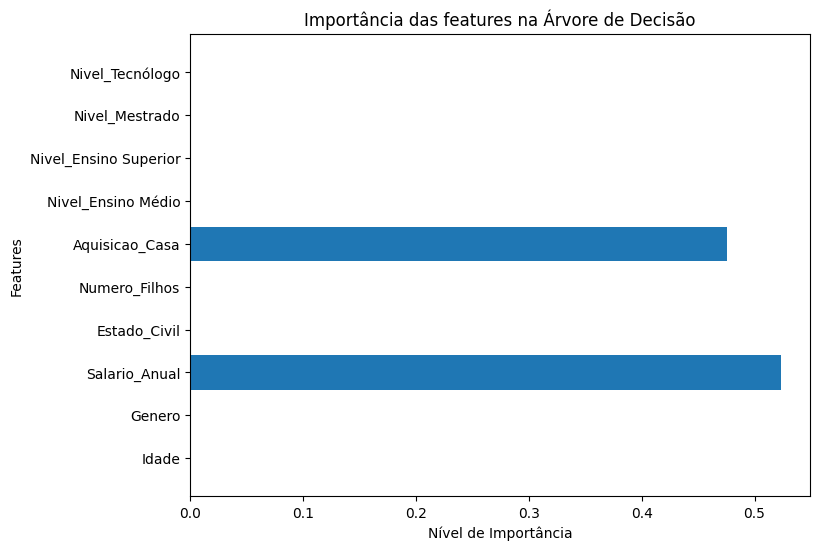

In [6]:
# identificando features importantes pelo gráfico
imp_features = arvore_credito.feature_importances_
nome_feature = x_treino.columns

plt.figure(figsize=(8, 6))
plt.barh(nome_feature, imp_features)
plt.title('Importância das features na Árvore de Decisão')
plt.xlabel('Nível de Importância')
plt.ylabel('Features')
plt.show()

- As features mais importantes utilizadas pelo modelo são as variáveis de Salário Anual e Aquisição de Casa, enquanto as demais tem influência baixa (variável Idade) ou Nula no modelo de decisão.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas e avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [7]:
# Modelo Árvore de Decisão com apenas 2 features
x_treino_reduz = x_treino[['Aquisicao_Casa','Salario_Anual']]
x_teste_reduz = x_teste[['Aquisicao_Casa','Salario_Anual']]

arvore_credito_reduz = DecisionTreeClassifier(criterion = 'gini',  random_state = 0)
arvore_credito_reduz.fit(x_treino_reduz, y_treino)
prev_reduz = arvore_credito_reduz.predict(x_teste_reduz)

# Verificando acurácia do modelo de teste com 2 features
prevt_reduz = arvore_credito_reduz.predict(x_teste_reduz)
acuraciat_reduz = accuracy_score(y_teste, prevt_reduz)
print('\nAcurácia do modelo de teste reduzido: ', acuraciat_reduz)


Acurácia do modelo de teste reduzido:  0.92


- O modelo apenas com as duas features indicadas acima, revela que o modelo teve 92% de acurácia, quase o mesmo valor do teste apresentando todas as features do dataframe. Isso pode nos dizer que as demais features não seriam necessárias para a generalização dos dados, indicando que a base possui mais complexidade que o necessário para a previsão dos níveis de Pontuação de Crédito.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

- Analisando atentamente os modelos acima e realizando a comparação entre ambos os modelos de Naive Bayes e Árvore de Decisão, conseguimos identificar que os modelos apresentam performances quase impecáveis. Porém, não é possível concluir sobre qual modelo é melhor para trabalhar nesta base de dados. O motivo se deve pelos fortes indícios dos dois modelos apresentarem overfitting nas fases de treino e teste, com um desempenho próximo ou igual a 1. O comportamento pertinente de manter uma média bem alta entre os valores de acurácia dso modelos, nos mostra que, na verdade, o modelo apenas memorizou valores e padrões específicos da base de trieno.

- Também é pertinente relembrar que, por mais que os modelos aparentem funcionar bem para bases com pouca quantidade de dados, a falta de diversificação das variáveis para a classificação pode dificultar os treinos e levá-los ao overfitting, tornando os valores de acurácia e outros cálculos de desempenho pouco confiáveis.